# Introdución
Este Notebook se utiliza para realizar un análisis descriptivo de la información, preprocesamiento de datos y entrenamiento previo de modelos

## **1. Instalación de librerias y cargue de información**



In [1]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [2]:
! pip install pycaret[models]
! pip install interpret
! pip install interpret-community
! pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 8.4 MB/s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.44.1
    Uninstalling shap-0.44.1:
      Successfully uninstalled shap-0.44.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
# Librerias para manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import compress
# Librerias para imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
# Librerias para selección de variables
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
# Librerias para división de información
from sklearn.model_selection import train_test_split
# Librerias de métricas
from sklearn.metrics import mean_squared_error , f1_score , classification_report , confusion_matrix
# Modelos
from pycaret.classification import ClassificationExperiment
from pycaret.regression import RegressionExperiment
# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Importancia de variables
from sklearn.ensemble import RandomForestRegressor
import shap

print('\nLibraries imported')


Libraries imported


In [34]:
# Cargar información
ruta_archivo = r''
nombre_archivo = 'Resultados__nicos_Saber_Pro_20231019.csv'
data_1 = pd.read_csv(ruta_archivo + nombre_archivo)
# Dejar sólo los datos de interes (universidad y programa específicos)
data_1 = data_1[data_1['INST_NOMBRE_INSTITUCION'] == 'CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMFACAUCA-POPAYAN']
data_1 = data_1[data_1['ESTU_PRGM_ACADEMICO'] == 'INGENIERIA INDUSTRIAL']
data_1

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_SNIES_PRGMACADEMICO,ESTU_PRIVADO_LIBERTAD,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_COLE_TERMINO,ESTU_PAGOMATRICULAPADRES,ESTU_ESTADOINVESTIGACION,ESTU_FECHANACIMIENTO,ESTU_PAGOMATRICULAPROPIO,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
2585,20203,EK202030301898,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,NaN,NaN,11.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Menos de 10 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,18/06/1997,No,TI,Primaria incompleta,No,No,Estrato 1,Si,Si,Primaria completa,NO OFICIAL - CORPORACIÓN,127,177.0,3.0,-A1,136,109.0,140
8544,20195,EK201950214843,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,1.191420e+11,19142.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19698.0,SANTANDER DE QUILICHAO,No,No,Entre 11 y 20 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,159,No,PUBLICAR,13/11/1983,Si,TI,Primaria incompleta,No,Si,NaN,Si,Si,Primaria incompleta,NO OFICIAL - CORPORACIÓN,100,133.0,2.0,-A1,106,118.0,105
16387,20195,EK201950214255,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,1.191420e+11,19142.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19698.0,SANTANDER DE QUILICHAO,No,No,Entre 11 y 20 horas,102076.0,N,COLOMBIA,ESTUDIANTE,F,158,Si,PUBLICAR,08/07/1997,No,TI,Primaria incompleta,Si,Si,Estrato 1,No,No,Secundaria (Bachillerato) completa,NO OFICIAL - CORPORACIÓN,163,162.0,3.0,A1,176,131.0,167
24270,20195,EK201950195978,CC,COLOMBIA,19.0,CAUCA,19001.0,POPAYÁN,NaN,NaN,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19001.0,POPAYÁN,No,Si,Más de 30 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,14/10/1994,No,CC,Secundaria (Bachillerato) incompleta,No,Si,Estrato 1,No,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,150,139.0,2.0,A1,120,141.0,85
28178,20195,EK201950252414,CC,COLOMBIA,19.0,CAUCA,19698.0,SANTANDER DE QUILICHAO,3.196980e+11,19698.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19698.0,SANTANDER DE QUILICHAO,Si,Si,Más de 30 horas,102

In [35]:
# Definir las columnas de los puntajes
columnas_puntajes = ['MOD_RAZONA_CUANTITAT_PUNT',
                     'MOD_COMUNI_ESCRITA_PUNT',
                     'MOD_COMUNI_ESCRITA_DESEM',
                     'MOD_INGLES_PUNT',
                     'MOD_LECTURA_CRITICA_PUNT',
                     'MOD_COMPETEN_CIUDADA_PUNT']
# Quitar los valores nulos de las columnas de puntaje
data = data_1.copy()
for i in columnas_puntajes:
    data = data[data[i].isnull() == False]

In [36]:
# Crear la columna de target como el promedio de todos los puntajes
data['PUNTAJE_GLOBAL'] = data[columnas_puntajes].mean(axis = 1)
data

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_COD_DEPTO_PRESENTACION,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_DEPARTAMENTO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_SNIES_PRGMACADEMICO,ESTU_PRIVADO_LIBERTAD,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_COLE_TERMINO,ESTU_PAGOMATRICULAPADRES,ESTU_ESTADOINVESTIGACION,ESTU_FECHANACIMIENTO,ESTU_PAGOMATRICULAPROPIO,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT,PUNTAJE_GLOBAL
2585,20203,EK202030301898,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,NaN,NaN,11.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,BOGOTÁ,11001.0,BOGOTÁ D.C.,No,No,Menos de 10 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,18/06/1997,No,TI,Primaria incompleta,No,No,Estrato 1,Si,Si,Primaria completa,NO OFICIAL - CORPORACIÓN,127,177.0,3.0,-A1,136,109.0,140,115.333333
8544,20195,EK201950214843,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,1.191420e+11,19142.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19698.0,SANTANDER DE QUILICHAO,No,No,Entre 11 y 20 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,159,No,PUBLICAR,13/11/1983,Si,TI,Primaria incompleta,No,Si,NaN,Si,Si,Primaria incompleta,NO OFICIAL - CORPORACIÓN,100,133.0,2.0,-A1,106,118.0,105,94.000000
16387,20195,EK201950214255,CC,COLOMBIA,19.0,CAUCA,19142.0,CALOTO,1.191420e+11,19142.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19698.0,SANTANDER DE QUILICHAO,No,No,Entre 11 y 20 horas,102076.0,N,COLOMBIA,ESTUDIANTE,F,158,Si,PUBLICAR,08/07/1997,No,TI,Primaria incompleta,Si,Si,Estrato 1,No,No,Secundaria (Bachillerato) completa,NO OFICIAL - CORPORACIÓN,163,162.0,3.0,A1,176,131.0,167,133.666667
24270,20195,EK201950195978,CC,COLOMBIA,19.0,CAUCA,19001.0,POPAYÁN,NaN,NaN,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUCA,19001.0,POPAYÁN,No,Si,Más de 30 horas,102076.0,N,COLOMBIA,ESTUDIANTE,M,NaN,Si,PUBLICAR,14/10/1994,No,CC,Secundaria (Bachillerato) incompleta,No,Si,Estrato 1,No,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,150,139.0,2.0,A1,120,141.0,85,106.166667
28178,20195,EK201950252414,CC,COLOMBIA,19.0,CAUCA,19698.0,SANTANDER DE QUILICHAO,3.196980e+11,19698.0,19.0,3831,CORPORACION UNIVERSITARIA COMFACAUCA - UNICOMF...,INSTITUCIÓN UNIVERSITARIA,INGENIERÍA INDUSTRIAL Y AFINES,CAUCA,19001,POPAYÁN,INGENIERIA INDUSTRIAL,CAUCA,19698,SANTANDER DE QUILICHAO,UNIVERSITARIO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,CAUC

In [37]:
# Mostrar columnas
data.columns.tolist()

['PERIODO',
 'ESTU_CONSECUTIVO',
 'ESTU_TIPODOCUMENTO',
 'ESTU_PAIS_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_CODDANE_COLE_TERMINO',
 'ESTU_COD_COLE_MCPIO_TERMINO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_NOMBRE_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_NUCLEO_PREGRADO',
 'ESTU_INST_DEPARTAMENTO',
 'ESTU_INST_CODMUNICIPIO',
 'ESTU_INST_MUNICIPIO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_PRGM_CODMUNICIPIO',
 'ESTU_PRGM_MUNICIPIO',
 'ESTU_NIVEL_PRGM_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_SNIES_PRGMACADEMICO',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_NACIONALIDAD',
 'ESTU_ESTUDIANTE',
 'ESTU_GENERO',
 'ESTU_COLE_TERMINO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACI

In [38]:
# Definir Target y tipos de datos
target = ['PUNTAJE_GLOBAL']
ignore_columns = ['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_INGLES_DESEM', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
                  'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO' , 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'INST_NOMBRE_INSTITUCION' , 'ESTU_INST_MUNICIPIO',
                  'ESTU_PRGM_MUNICIPIO' , 'ESTU_VALORMATRICULAUNIVERSIDAD' , 'ESTU_MCPIO_PRESENTACION' , 'ESTU_HORASSEMANATRABAJA' , 'ESTU_NACIONALIDAD' , 'ESTU_ESTUDIANTE',
                  'ESTU_COLE_TERMINO' , 'ESTU_FECHANACIMIENTO' , 'ESTU_TIPODOCUMENTOSB11' , 'ESTU_PAIS_RESIDE',]
numeric_features = []
categorical_features = [i for i in data.columns.tolist() if i not in target and i not in numeric_features and i not in ignore_columns]
categorical_features

['ESTU_DEPTO_RESIDE',
 'ESTU_MCPIO_RESIDE',
 'ESTU_CODDANE_COLE_TERMINO',
 'ESTU_COD_COLE_MCPIO_TERMINO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_NUCLEO_PREGRADO',
 'ESTU_INST_DEPARTAMENTO',
 'ESTU_INST_CODMUNICIPIO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_PRGM_CODMUNICIPIO',
 'ESTU_NIVEL_PRGM_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_SNIES_PRGMACADEMICO',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_GENERO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENELAVADORA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONMADRE',
 'INST_ORIGEN']

## **2. EDA**

In [39]:
# Describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 2585 to 1176877
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERIODO                         266 non-null    int64  
 1   ESTU_CONSECUTIVO                266 non-null    object 
 2   ESTU_TIPODOCUMENTO              266 non-null    object 
 3   ESTU_PAIS_RESIDE                266 non-null    object 
 4   ESTU_COD_RESIDE_DEPTO           266 non-null    float64
 5   ESTU_DEPTO_RESIDE               266 non-null    object 
 6   ESTU_COD_RESIDE_MCPIO           266 non-null    float64
 7   ESTU_MCPIO_RESIDE               266 non-null    object 
 8   ESTU_CODDANE_COLE_TERMINO       170 non-null    float64
 9   ESTU_COD_COLE_MCPIO_TERMINO     170 non-null    float64
 10  ESTU_COD_DEPTO_PRESENTACION     266 non-null    float64
 11  INST_COD_INSTITUCION            266 non-null    int64  
 12  INST_NOMBRE_INSTITUCION      

In [40]:
# Mostrar valores nulos
null_values_count = pd.DataFrame(data.isnull().sum() / data.shape[0]).sort_values(by = 0 , ascending = False).T
null_values_count.T

,0
ESTU_CODDANE_COLE_TERMINO,0.360902
ESTU_COD_COLE_MCPIO_TERMINO,0.360902
ESTU_COLE_TERMINO,0.345865
FAMI_ESTRATOVIVIENDA,0.075188
FAMI_TIENELAVADORA,0.071429
FAMI_TIENEAUTOMOVIL,0.067669
FAMI_TIENECOMPUTADOR,0.067669
FAMI_TIENEINTERNET,0.052632
ESTU_HORASSEMANATRABAJA,0.052632
FAMI_EDUCACIONPADRE,0.037594


In [41]:
# Quitar categorias con más del 50% de nans
to_drop_features = [i for i in null_values_count.columns.tolist() if null_values_count[i].values[0] > 0.5]
data = data.drop(columns = to_drop_features)
# Re definir variables
categorical_features = [i for i in categorical_features if i in data.columns.tolist()]
numeric_features = [i for i in numeric_features if i in data.columns.tolist()]
print('Variables Eliminadas:')
to_drop_features

Variables Eliminadas:


[]

<Axes: ylabel='Density'>

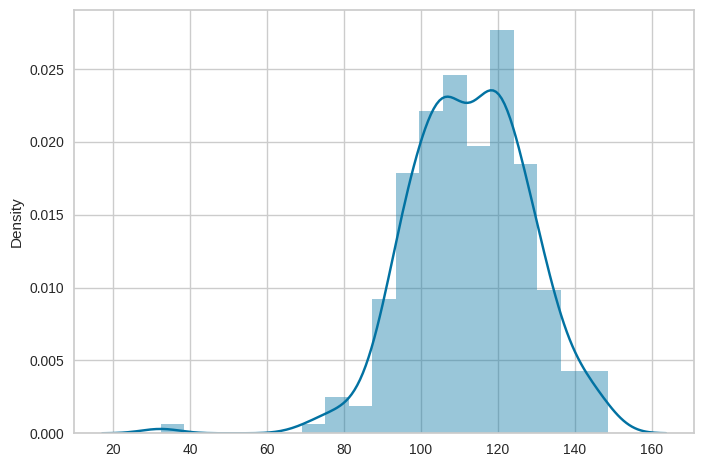

In [42]:
# Mostrar distribución del target
plt.figure()
sns.distplot(data[target])

In [43]:
# Imputar información
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

numerical_imputer = IterativeImputer(imputation_order = 'ascending',
                                     max_iter = 500,
                                     random_state = 42,
                                     n_nearest_features = 10)
#data[numeric_features] = numerical_imputer.fit_transform(data[numeric_features])

In [44]:
# Graficar variables numéricas
for col in numeric_features:
    try:
      plt.figure()
      sns.distplot(data[col])
    except:
      print(f'Column {col} is not numeric')

In [45]:
# Verificar nuevamente que no existan nulos
(data.isnull().sum() / data.shape[0]).sort_values()

PERIODO                           0.000000
ESTU_PAGOMATRICULACREDITO         0.000000
ESTU_SNIES_PRGMACADEMICO          0.000000
ESTU_PRIVADO_LIBERTAD             0.000000
ESTU_NACIONALIDAD                 0.000000
ESTU_ESTUDIANTE                   0.000000
ESTU_GENERO                       0.000000
ESTU_PAGOMATRICULAPADRES          0.000000
ESTU_ESTADOINVESTIGACION          0.000000
ESTU_FECHANACIMIENTO              0.000000
ESTU_PAGOMATRICULAPROPIO          0.000000
FAMI_EDUCACIONPADRE               0.000000
MOD_COMPETEN_CIUDADA_PUNT         0.000000
FAMI_TIENEAUTOMOVIL               0.000000
FAMI_ESTRATOVIVIENDA              0.000000
FAMI_TIENECOMPUTADOR              0.000000
FAMI_TIENEINTERNET                0.000000
FAMI_EDUCACIONMADRE               0.000000
INST_ORIGEN                       0.000000
MOD_RAZONA_CUANTITAT_PUNT         0.000000
MOD_COMUNI_ESCRITA_PUNT           0.000000
MOD_COMUNI_ESCRITA_DESEM          0.000000
MOD_INGLES_DESEM                  0.000000
MOD_LECTURA

In [46]:
# Qualitative variable analysis
for i in list(data.columns):
    if i not in numeric_features:
        print('-' * 50)
        print(f'{i :-<20} : {data[i].unique()}')

--------------------------------------------------
PERIODO------------- : [20203 20195 20212 20183 20225 20226 20222]
--------------------------------------------------
ESTU_CONSECUTIVO---- : ['EK202030301898' 'EK201950214843' 'EK201950214255' 'EK201950195978'
 'EK201950252414' 'EK201950238786' 'EK201950323154' 'EK202120090339'
 'EK201830035564' 'EK202030185019' 'EK201830126040' 'EK202120251233'
 'EK202120281143' 'EK202030185064' 'EK202030306611' 'EK202120251316'
 'EK202120309336' 'EK201950350645' 'EK201950330338' 'EK201830053374'
 'EK202120118994' 'EK202120089658' 'EK201950327591' 'EK201950332783'
 'EK201950355553' 'EK201830114949' 'EK202030185811' 'EK202120089858'
 'EK201950264626' 'EK201950199132' 'EK201950327651' 'EK201950308232'
 'EK202030302022' 'EK201830021884' 'EK201830107727' 'EK202120090495'
 'EK202030129649' 'EK202030129685' 'EK202030301711' 'EK202120090116'
 'EK202120217199' 'EK201830037465' 'EK202120090480' 'EK202120089632'
 'EK202030302380' 'EK202030129628' 'EK20203030199

## **3. Ingeniería de características**

In [47]:
# Definir X  Y
X = data.drop(columns = ignore_columns + target).copy()
Y = data[target].copy()

## **4. Entrenamiento de modelos**

In [48]:
# Separar información
test_size = 0.33
X_train , X_test , Y_train , Y_test = train_test_split(X,
                                                      Y,
                                                      test_size = test_size,
                                                      random_state = 123)
# Definir funciones para evaluación
def regression_model_evaluation(model , X_test , Y_test , score_list , model_name):
    prediction = model.predict(X_test)
    score = mean_squared_error(Y_test , prediction) ** 0.5
    score_list.append(score)
    print('\n-----------------------------------------------------------------\n')
    print(f'Modelo : {model_name} obtuvo RMSE de {score}')

### **4.1 Model training using all the features**

#### **4.1.1 PyCaret**

In [49]:
experiment_4_1_1 = RegressionExperiment()
experiment_4_1_1.setup(data = pd.concat([X_train , Y_train] , axis = 1),
                       test_data = pd.concat([X_test , Y_test] , axis = 1),
                       target = target[0],
                       numeric_features = numeric_features,
                       categorical_features = categorical_features,
                       ignore_features = ignore_columns,
                       normalize = True,
                       session_id = 1234)

,Description,Value
0,Session id,1234
1,Target,PUNTAJE_GLOBAL
2,Target type,Regression
3,Original data shape,"(266, 34)"
4,Transformed data shape,"(266, 102)"
5,Transformed train set shape,"(178, 102)"
6,Transformed test set shape,"(88, 102)"
7,Ignore features,24
8,Ordinal features,10
9,Categorical features,33


In [50]:
# Train models
best_model_4_1_1 = experiment_4_1_1.compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,13.0863,288.4020,16.7650,-0.0875,0.1627,0.1295,0.5200
lightgbm,Light Gradient Boosting Machine,13.5175,309.7426,17.4721,-0.2161,0.1667,0.1305,0.9010
dummy,Dummy Regressor,13.3879,283.5771,16.6445,-0.0554,0.1608,0.1327,0.4580
catboost,CatBoost Regressor,13.6096,299.5140,16.9945,-0.1155,0.1635,0.1328,2.0120
en,Elastic Net,13.8904,315.8127,17.5340,-0.1879,0.1691,0.1367,0.4590
lasso,Lasso Regression,13.9508,314.3120,17.5571,-0.1974,0.1688,0.1375,0.4660
knn,K Neighbors Regressor,14.0127,305.2790,17.3365,-0.1742,0.1664,0.1378,0.4660
llar,Lasso Least Angle Regression,14.0322,316.9817,17.6454,-0.2075,0.1694,0.1381,0.4740
br,Bayesian Ridge,14.0510,320.3787,17.6576,-0.2025,0.1701,0.1385,0.4700
rf,Random Forest Regressor,14.2656,328.1491,17.8588,-0.2527,0.1713,0.1389,0.6850


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

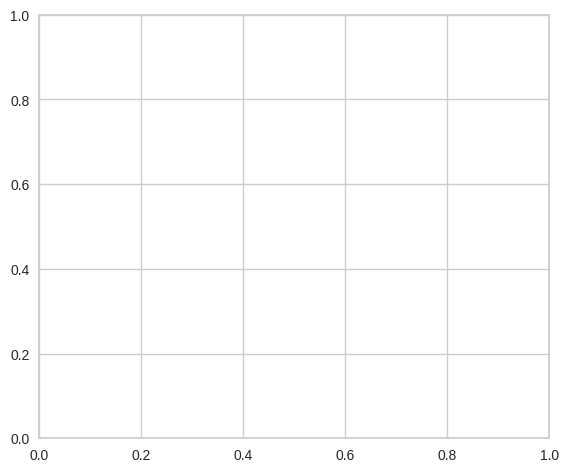

In [51]:
experiment_4_1_1.evaluate_model(best_model_4_1_1)